# P1: Nifty Neural Networks!


## Table Of Content

1. Introduction
2. Preliminaries
3. Software Setup
4. Implementation
5. Grading Rubric
6. Report guidelines
7. Useful Resources

## 1. Introduction

Neural networks, at their core, function like any other mathematical function that can be evaluated. The process of evaluating a neural network is referred to as the forward pass. During this step, inputs are passed through the network layers, and outputs are generated.

To optimize the network's performance, its weights and biases need to be adjusted. This is done through a process called backward propagation (or backpropagation). In this step, the gradients of the loss function with respect to each parameter are calculated, and these gradients are subtracted from the corresponding weights and biases, allowing the network to learn and improve its predictions.

In this assignment, you will dive into the implementation of custom layers in PyTorch. Specifically, you will focus on coding the forward pass and computing the gradients necessary for the backward pass. Before you begin, make sure to review the grading rubric to understand the criteria for evaluation.

## 2. Preliminaries

### CIFAR10 Dataset

CIFAR-10 is a dataset consisting of 60000, 32×32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More details about the datset can be found [here](http://www.cs.toronto.edu/~kriz/cifar.html).

Sample images from each class of the CIFAR-10 dataset is shown below:

![CIFAR 10](./artifacts/cifar10.png)

In this project, you will classify images into these 10 classes using the provided pipeline,loaders and helper classes.

Additionally, you are expected to generate a confusion matrix to evaluate your model's performance. For guidance on plotting a confusion matrix in PyTorch, please refer to this [resource](https://stackoverflow.com/questions/74020233/how-to-plot-confusion-matrix-in-pytorch).

### Linear Layer
A linear layer in a neural network performs a linear transformation of the input data. It is defined by the following components:

1. Weights
2. Biases

More details below,

[Pytorch Linear Layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

You can find information about the dimension of weights and biases in custom_layers.py

### Soft Max
The Softmax function is commonly used in neural networks for multi-class classification problems. It converts a vector of raw scores (logits) into probabilities, making it possible to interpret the output as the likelihood of each class.

[Sample implementation](https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python)

More details [here](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).

### Convolutional Layer

A convolutional layer is a fundamental building block in Convolutional Neural Networks (CNNs) used primarily for processing grid-like data such as images. It applies convolution operations to detect local features in the input.

Although it is called a convolutional layer, the PyTorch implementation of conv2d does not actually perform a convolution in the mathematical sense. Instead, it performs a cross-correlation operation, where the kernel is not flipped. This distinction is important to note, but for most deep learning projects including this one, cross-correlation is perfectly fine as the weights will automatically adjust during training.

For more details, refer to [P0](https://rbe549.github.io/rbe474x/fall2024a/proj/p0/).


## 3. Software Setup

Use a code editor like VSCode and open this entire folder.

For each part, you will be implementing the corresponding layers in custom_layers.py

The code will automatically be tested with test.py. 

To run the test, open a terminal in the current folder and run,

`pytest -s -v test.py`

## 4. Implementation 


### Part1 : Implement Your Custom Layers for Multi Layer Perceptron (MLP)

Open custom_layers.py and implement a fully connected, relu and softmax layer.

Verify it by running the below code. Feel free to modify the below snippet. But do not modify my test.py

For more information about supplying gradients, please refer to [examples_autograd](https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html).

In [1]:
import importlib
import torch
import torch.nn as nn

import networks as net
importlib.reload(net)

print("\nLinear")

# Check gradient input 
u_custom  = torch.rand((1, 10), requires_grad=True)  # leaf with grad
u_inbuilt = u_custom.detach().clone().requires_grad_(True)

customLayer = net.CustomLinear(10, 2)
inbuiltLayer = nn.Linear(in_features=10, out_features=2)

inbuiltLayer.weight.data.copy_(customLayer.weight.data)
inbuiltLayer.bias.data.copy_(customLayer.bias.data)

y_custom = customLayer(u_custom)
y_inbuilt = inbuiltLayer(u_inbuilt)

print("Inference for linear layer")
print(y_custom)
print(y_inbuilt)

lossFunc = nn.MSELoss()

loss_custom = lossFunc(y_custom, torch.zeros_like(y_custom))
loss_in = lossFunc(y_inbuilt, torch.zeros_like(y_inbuilt))

loss_custom.backward()
loss_in.backward()

print("\ngraidents for linear layer")
print(customLayer.weight.grad)
print(inbuiltLayer.weight.grad)

print(customLayer.bias.grad)
print(inbuiltLayer.bias.grad)

print(u_custom.grad)
print(u_inbuilt.grad)

# RELU
print("\nRELU")
u1 = torch.rand((1, 10), requires_grad=True)
u2 = u1.detach().clone()
u2.requires_grad_()

customLayer = net.CustomReLU()
inbuiltLayer = nn.ReLU()

y_custom = customLayer(u1)
y_inbuilt = inbuiltLayer(u2)

loss_custom = lossFunc(y_custom, torch.zeros_like(y_custom))
loss_in = lossFunc(y_inbuilt, torch.zeros_like(y_inbuilt))

loss_custom.backward()
loss_in.backward()

print("inference")
print(y_custom, y_inbuilt)

print("gradients of loss relative to the input")
print(u1.grad)
print(u2.grad)

# SOFTMAX
print("\n SoftMax")

u1 = torch.rand((1, 10), requires_grad=True)
u2 = u1.detach().clone()
u2.requires_grad_()
customLayer = net.CustomSoftmax(1)
inbuiltLayer = nn.Softmax(-1)

y_custom = customLayer(u1)
y_inbuilt = inbuiltLayer(u2)

print(y_custom)
print(y_inbuilt)

loss_custom = lossFunc(y_custom, torch.zeros_like(y_custom))
loss_in = lossFunc(y_inbuilt, torch.zeros_like(y_inbuilt))

loss_custom.backward()
loss_in.backward()

print("gradients of loss relative to the input")
print(u1.grad)
print(u2.grad)



/home/fer/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "



Linear
Inference for linear layer
tensor([[ 0.1505, -0.3249]], grad_fn=<CustomLinearLayerBackward>)
tensor([[ 0.1505, -0.3249]], grad_fn=<AddmmBackward0>)

graidents for linear layer
tensor([[ 0.0499,  0.0237,  0.1034,  0.0421,  0.0830,  0.0179,  0.1026,  0.1116,
          0.0253,  0.1190],
        [-0.1077, -0.0511, -0.2233, -0.0909, -0.1791, -0.0387, -0.2216, -0.2411,
         -0.0546, -0.2569]])
tensor([[ 0.0499,  0.0237,  0.1034,  0.0421,  0.0830,  0.0179,  0.1026,  0.1116,
          0.0253,  0.1190],
        [-0.1077, -0.0511, -0.2233, -0.0909, -0.1791, -0.0387, -0.2216, -0.2411,
         -0.0546, -0.2569]])
tensor([ 0.1505, -0.3249])
tensor([ 0.1505, -0.3249])
tensor([[ 0.0819,  0.0190, -0.0509,  0.0489,  0.0473,  0.0880,  0.0001,  0.0627,
         -0.0557,  0.0576]])
tensor([[ 0.0819,  0.0190, -0.0509,  0.0489,  0.0473,  0.0880,  0.0001,  0.0627,
         -0.0557,  0.0576]])

RELU
inference
tensor([[0.5877, 0.2480, 0.7755, 0.3367, 0.5868, 0.5700, 0.9060, 0.5867, 0.3415,
       

### Part 2: MLP Network Training

Now that you have implemented an MLP from scratch, it's time to train it and verify its ability to classify objects. This network is expected to achieve an accuracy of approximately 40%.

Additionally, you are required to save one of your best model checkpoints as mlp.pth in the current folder. This file will be used for automated testing.

Furthermore, please implement a confusion matrix in the utils file, specifically within the val_step method of the Pipeline class. You may use any available implementation of the confusion matrix, but ensure that all tests continue to pass.

In [2]:
# Lets train a CIFAR10 image classifier
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
#importlib.reload(net)
pipeline = net.Pipeline()
model = net.CustomMLP().to(pipeline.device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

home_path = os.path.expanduser("./")
JOB_FOLDER=os.path.join(home_path, "outputs/")
TRAINED_MDL_PATH = os.path.join(JOB_FOLDER, "cifar/mlp/")

import os
os.makedirs(JOB_FOLDER, exist_ok=True)
os.makedirs(TRAINED_MDL_PATH, exist_ok=True)

epochs = 40

trainLossList = []
valAccList = []

best_val_acc = -float("inf")
best_epoch = -1


for eIndex in range(epochs):
    print("Epoch count: ", eIndex)
    
    train_epochloss = pipeline.train_step(model, optimizer)
    val_acc = pipeline.val_step(model)

    print(eIndex, train_epochloss, val_acc)

    valAccList.append(val_acc)
    trainLossList.append(train_epochloss)

    trainedMdlPath = TRAINED_MDL_PATH + f"{eIndex}.pth"
    torch.save(model.state_dict(), trainedMdlPath)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = eIndex
        torch.save(model.state_dict(), "mlp.pth") 
        print(f"BEST saved mlp.pth at epoch {eIndex} (val_acc={val_acc:.2f}%)")

trainLosses = np.array(trainLossList)
testAccuracies = np.array(valAccList)

np.savetxt("train_mlp.log", trainLosses)
np.savetxt("test_mlp.log", testAccuracies)

Files already downloaded and verified
Files already downloaded and verified
Epoch count:  0
0 3400.105337023735 31.75
BEST saved mlp.pth at epoch 0 (val_acc=31.75%)
Epoch count:  1
1 3328.2176662683487 33.69
BEST saved mlp.pth at epoch 1 (val_acc=33.69%)
Epoch count:  2
2 3290.448949098587 35.49
BEST saved mlp.pth at epoch 2 (val_acc=35.49%)
Epoch count:  3
3 3259.4535195827484 36.82
BEST saved mlp.pth at epoch 3 (val_acc=36.82%)
Epoch count:  4
4 3234.9716527462006 36.85
BEST saved mlp.pth at epoch 4 (val_acc=36.85%)
Epoch count:  5
5 3211.610500097275 38.58
BEST saved mlp.pth at epoch 5 (val_acc=38.58%)
Epoch count:  6
6 3188.7219336032867 39.36
BEST saved mlp.pth at epoch 6 (val_acc=39.36%)
Epoch count:  7
7 3166.2890664339066 39.56
BEST saved mlp.pth at epoch 7 (val_acc=39.56%)
Epoch count:  8
8 3147.1115021705627 40.53
BEST saved mlp.pth at epoch 8 (val_acc=40.53%)
Epoch count:  9
9 3128.866179704666 41.19
BEST saved mlp.pth at epoch 9 (val_acc=41.19%)
Epoch count:  10
10 3111.657

In [3]:
import matplotlib.pyplot as plt
import scienceplots

def plot_samples(data, label, name):
    with plt.style.context(["science", "no-latex"]):
        fig, ax = plt.subplots(figsize=(8, 2))

        
        ax.plot(data, label=label)

        ax.set_xlabel("Epochs")
        ax.set_ylabel(label)
        ax.autoscale(tight=True)
        ax.legend()

        
        fig.savefig(f"{name}.pdf", dpi=300, bbox_inches="tight")

        plt.close(fig)

    return None

In [4]:
plot_samples(trainLosses, "Loss", "MLP_LOSS")
plot_samples(testAccuracies, "Accuracy ", "MLP_ACCURACY")

### Part 3: Implement Convolutional Neural Networks (CNN) Using PyTorch layers

CNNs excel in capturing local patterns and spatial hierarchies through convolutional filters, which makes them more effective for image and spatial data. They also use parameter sharing, reducing the number of parameters and computational cost compared to MLPs. Additionally, CNNs offer translation invariance and hierarchical feature learning, enabling them to recognize features across different spatial locations and build complex patterns efficiently.

Open networks.py and implement `RefCNN` using the inbuilt layers in pytorch. Make sure it is similar to CustomCNN() which uses custom layers.

Train and compare the train loss and validation accuracy against MLP. 

Please copy the best checkpoint file in current folder as cnn_inbuilt.pth for automated tests. It is expected to be higher than 50%.

In [5]:
# Lets train a CIFAR10 image classifier
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
importlib.reload(net)

pipeline = net.Pipeline()
model = net.RefCNN().to(pipeline.device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

home_path = os.path.expanduser("~")
JOB_FOLDER=os.path.join(home_path, "outputs/")
TRAINED_MDL_PATH = os.path.join(JOB_FOLDER, "cifar/cnn_inbuilt_layers/")

import os
os.makedirs(JOB_FOLDER, exist_ok=True)
os.makedirs(TRAINED_MDL_PATH, exist_ok=True)

epochs = 40
trainLossList = []
valAccList = []

best_val_acc = -float("inf")
best_epoch = -1

for eIndex in range(epochs):
    # print("Epoch count: ", eIndex)
    
    train_epochloss = pipeline.train_step(model, optimizer)
    print("train complete")
    val_acc = pipeline.val_step(model)

    print(eIndex, train_epochloss, val_acc)

    valAccList.append(val_acc)
    trainLossList.append(train_epochloss)

    trainedMdlPath = TRAINED_MDL_PATH + f"{eIndex}.pth"
    torch.save(model.state_dict(), trainedMdlPath)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = eIndex
        torch.save(model.state_dict(), "cnn_inbuilt.pth") 
        print(f"BEST saved cnn_inbuilt at epoch {eIndex} (val_acc={val_acc:.2f}%)")
    

trainLosses = np.array(trainLossList)
testAccuracies = np.array(valAccList)

np.savetxt("train_cnn_inbuilt.log", trainLosses)
np.savetxt("test_cnn_inbuilt.log", testAccuracies)

Files already downloaded and verified
Files already downloaded and verified
train complete
0 3396.3351991176605 31.97
BEST saved cnn_inbuilt at epoch 0 (val_acc=31.97%)
train complete
1 3316.9577473402023 35.02
BEST saved cnn_inbuilt at epoch 1 (val_acc=35.02%)
train complete
2 3275.3401931524277 37.6
BEST saved cnn_inbuilt at epoch 2 (val_acc=37.60%)
train complete
3 3237.8501485586166 40.4
BEST saved cnn_inbuilt at epoch 3 (val_acc=40.40%)
train complete
4 3199.2420811653137 41.23
BEST saved cnn_inbuilt at epoch 4 (val_acc=41.23%)
train complete
5 3162.697119116783 43.45
BEST saved cnn_inbuilt at epoch 5 (val_acc=43.45%)
train complete
6 3130.3807402849197 45.09
BEST saved cnn_inbuilt at epoch 6 (val_acc=45.09%)
train complete
7 3104.2013511657715 46.01
BEST saved cnn_inbuilt at epoch 7 (val_acc=46.01%)
train complete
8 3080.251173377037 45.23
train complete
9 3057.188807249069 46.52
BEST saved cnn_inbuilt at epoch 9 (val_acc=46.52%)
train complete
10 3038.0935193300247 47.13
BEST sa

In [7]:
plot_samples(trainLosses, "Loss", "CNN_INBUILT_LOSS")
plot_samples(testAccuracies, "Accuracy ", "CNN_INBUILT_ACCURACY")

### Part 4: Implement Your Custom Layers for Convolutional Neural Networks (CNN)

Open custom_layers.py and implement the CustomConvLayer.

Verify it by running the below code. Feel free to modify the below snippet. But do not modify my test.py

For more information about supplying gradients, please refer to [examples_autograd](https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html).

In [8]:
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
importlib.reload(net)

inbuiltLayer = nn.Conv2d(2, 3, 3, stride=2, padding='valid')
customLayer = net.CustomConv2d(2, 3, 3, 2)

inbuiltLayer.weight.data.copy_(customLayer.weight.data)
inbuiltLayer.bias.data.copy_(customLayer.bias.data)

u1 = torch.rand((1, 2, 5, 5), requires_grad=True)
u2 = u1.detach().clone()
u2.requires_grad_()

y1 = inbuiltLayer(u1)
y2 = customLayer(u2)

print("Conv. Inference")
print(y1)
print(y2)

lossFunc = nn.MSELoss()
loss_custom = lossFunc(y2, torch.zeros_like(y2))
loss_in = lossFunc(y1, torch.zeros_like(y1))

loss_in.backward()
loss_custom.backward()

print("gradients of loss relative to the weights")
print(inbuiltLayer.weight.grad)
print(customLayer.weight.grad)

print("gradients of loss relative to the bias")
print(inbuiltLayer.bias.grad)
print(customLayer.bias.grad)

print("gradients of loss relative to the input")
print(u1.grad)
print(u2.grad)


Conv. Inference
tensor([[[[-0.2506, -2.8219],
          [-0.5303, -1.0692]],

         [[ 2.3159,  1.5788],
          [ 3.5786,  3.0594]],

         [[ 1.4651,  0.8561],
          [-0.8348,  0.7310]]]], grad_fn=<ConvolutionBackward0>)
tensor([[[[-0.2506, -2.8219],
          [-0.5303, -1.0692]],

         [[ 2.3159,  1.5788],
          [ 3.5786,  3.0594]],

         [[ 1.4651,  0.8561],
          [-0.8348,  0.7310]]]], grad_fn=<CustomConvLayerBackward>)
gradients of loss relative to the weights
tensor([[[[-0.2154, -0.4804, -0.4178],
          [-0.2466, -0.3324, -0.3091],
          [-0.1791, -0.5252, -0.2178]],

         [[-0.6315, -0.4024, -0.3032],
          [-0.3305, -0.3392, -0.3301],
          [-0.5373, -0.4513, -0.2497]]],


        [[[ 0.5849,  0.8853,  0.5619],
          [ 0.7895,  0.7153,  0.6262],
          [ 0.5791,  1.2737,  0.3984]],

         [[ 1.0028,  0.9618,  0.8793],
          [ 0.7455,  0.9205,  0.7567],
          [ 1.3350,  1.1468,  1.1105]]],


        [[[-0.0353,  

### Part 5: CNN Network Training

Train and compare the train loss and validation accuracy against MLP and inbuilt conv layers. 

Please copy the best checkpoint file in current folder as `cnn_custom.pth` for automated tests. It is expected to be higher than 50%.

In [9]:
# Lets train a CIFAR10 image classifier
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
importlib.reload(net)

pipeline = net.Pipeline()
model = net.CustomCNN().to(pipeline.device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

home_path = os.path.expanduser("~")
JOB_FOLDER=os.path.join(home_path, "outputs/")
TRAINED_MDL_PATH = os.path.join(JOB_FOLDER, "cifar/cnn_custom_layer/")

import os
os.makedirs(JOB_FOLDER, exist_ok=True)
os.makedirs(TRAINED_MDL_PATH, exist_ok=True)

epochs = 40
trainLossList = []
valAccList = []

best_val_acc = -float("inf")
best_epoch = -1

for eIndex in range(epochs):
    # print("Epoch count: ", eIndex)
    
    train_epochloss = pipeline.train_step(model, optimizer)
    print("train complete")
    val_acc = pipeline.val_step(model)

    print(eIndex, train_epochloss, val_acc)

    valAccList.append(val_acc)
    trainLossList.append(train_epochloss)

    trainedMdlPath = TRAINED_MDL_PATH + f"{eIndex}.pth"
    torch.save(model.state_dict(), trainedMdlPath)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = eIndex
        torch.save(model.state_dict(), "cnn_custom.pth") 
        print(f"BEST saved cnn_custom at epoch {eIndex} (val_acc={val_acc:.2f}%)")

trainLosses = np.array(trainLossList)
testAccuracies = np.array(valAccList)

np.savetxt("train_cnn_custom.log", trainLosses)
np.savetxt("test_cnn_custom.log", testAccuracies)

plot_samples(trainLosses, "Loss", "CNN_CUSTOM_LOSS")
plot_samples(testAccuracies, "Accuracy ", "CNN_CUSTOM_ACCURACY")

Files already downloaded and verified
Files already downloaded and verified
train complete
0 3366.449597597122 35.06
BEST saved cnn_custom at epoch 0 (val_acc=35.06%)
train complete
1 3253.6440790891647 39.99
BEST saved cnn_custom at epoch 1 (val_acc=39.99%)
train complete
2 3190.0756834745407 41.37
BEST saved cnn_custom at epoch 2 (val_acc=41.37%)
train complete
3 3137.132972240448 43.48
BEST saved cnn_custom at epoch 3 (val_acc=43.48%)
train complete
4 3095.606787919998 44.77
BEST saved cnn_custom at epoch 4 (val_acc=44.77%)
train complete
5 3055.4757573604584 46.08
BEST saved cnn_custom at epoch 5 (val_acc=46.08%)
train complete
6 3018.9315123558044 46.16
BEST saved cnn_custom at epoch 6 (val_acc=46.16%)
train complete
7 2988.6662899255753 48.22
BEST saved cnn_custom at epoch 7 (val_acc=48.22%)
train complete
8 2956.8439984321594 48.4
BEST saved cnn_custom at epoch 8 (val_acc=48.40%)
train complete
9 2927.659026145935 49.06
BEST saved cnn_custom at epoch 9 (val_acc=49.06%)
train com

In [14]:
def plot_comparative(data):
    with plt.style.context(["science", "no-latex"]):
        fig, ax = plt.subplots(figsize=(8, 2))
        labels = ["mlp", "cnn_inbuilt", "cnn_custom"]
        for i in range(data.shape[0]):
            ax.plot(data[i, :], label=f"{labels[i]}")
        ax.legend(loc = "upper right")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Accuracy")
        ax.autoscale(tight=True)
        fig.savefig("comparative.pdf", dpi=300, bbox_inches="tight")
    return None

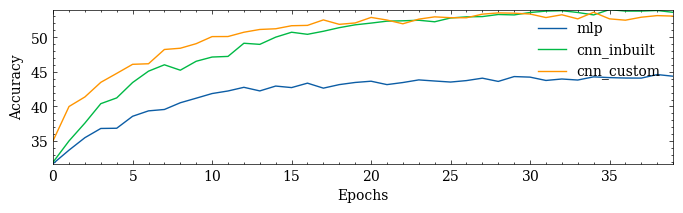

In [15]:
cnn_custom = np.loadtxt("test_cnn_custom.log")
cnn_inbuilt = np.loadtxt("test_cnn_inbuilt.log")
mlp = np.loadtxt("test_mlp.log")
data = np.vstack((mlp, cnn_inbuilt, cnn_custom))
plot_comparative(data)

## 5. Grading Rubric

- part 1 : 60
- part 2 : 10
- part 3 : 10
- part 4 : 10
- part 5 : 10

For RBE474X: part1 + part2 + part3 = 100% of the grade (80/80).
For RBE595-A01-SP: You are expected to implement part1-part5 for getting full credits (100/100).

Your code will be evaluated with test.py. Please run it and ensure that the tests pass before submitting. Instructions are in software setup section.

Please note that I will replace the test.py with my original test.py before evaluating.

Please do not submit the data folder that is downloaded while training the network. It is over 300 MB. Anyone submitting data will be penalized! Your submission should not be more than 20 MB.

## 6. Report Guidelines

Report must be in Latex.

Include the following,

1. Training loss curve (loss vs epoch count)
2. Confusion Matrix for validation set (val_step)
3. Accuracy comparison between MLP, CNN (torch layers) and CNN (custom_layers)

## 7. Useful Resources

Here are some YouTube videos that can help you with project 1.

1. [Back Propagation from scratch](https://www.youtube.com/watch?v=4shguqlkTDM)
2. [Back Propagation](https://www.youtube.com/watch?v=YOlOLxrMUOw)
3. [Back Propagation in CNN](https://www.youtube.com/watch?v=z9hJzduHToc)

Additionally, you may find [torch einsum](https://pytorch.org/docs/stable/generated/torch.einsum.html) function really helpful for multidimensional tensor-tensor products. It is a physics concept that got used/abused by programmers.

[Index notation and torch einsum](https://www.youtube.com/watch?v=IvgV6QcsC64)


